In [1]:
from draw_MR import *
from degreeAnalysis import *
import networkx as NX

% matplotlib inline

# Run all the analysis for all the 5 graphs

To avoid that the output looks too messy, I stored all the variable in dictionary and can be reached using the title name.

# R/M graph'


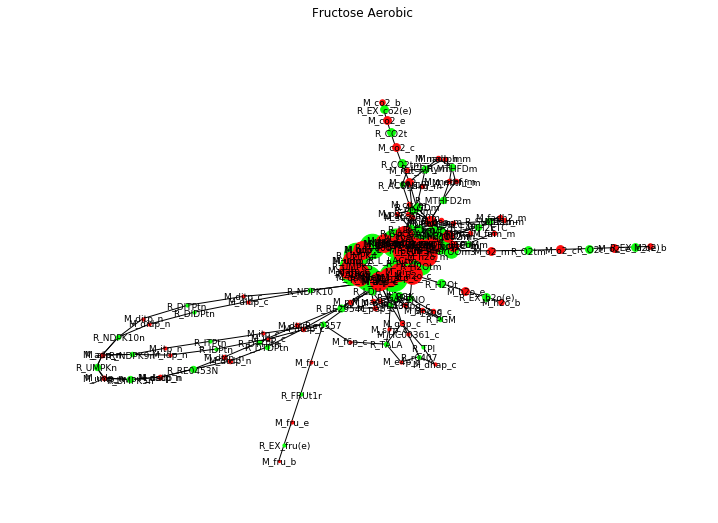

# Degree analysis


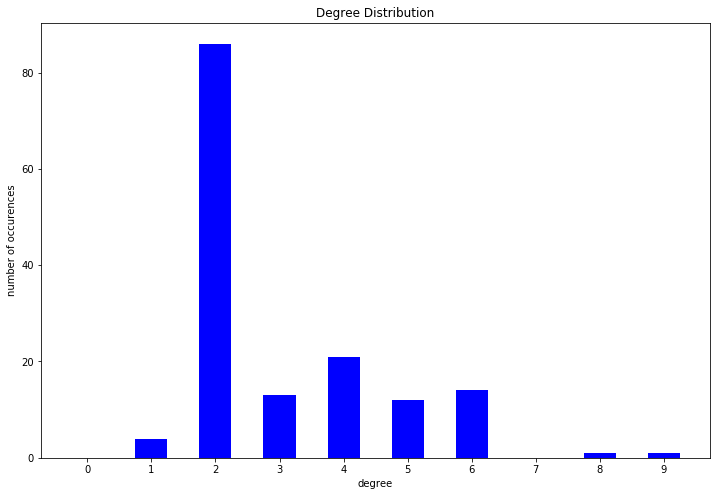

Average degree 3.02631578947
variance: 2.35457063712
Node M_h_m has the greatest degree: 9

# Compartment Analysis
# R/M graph'


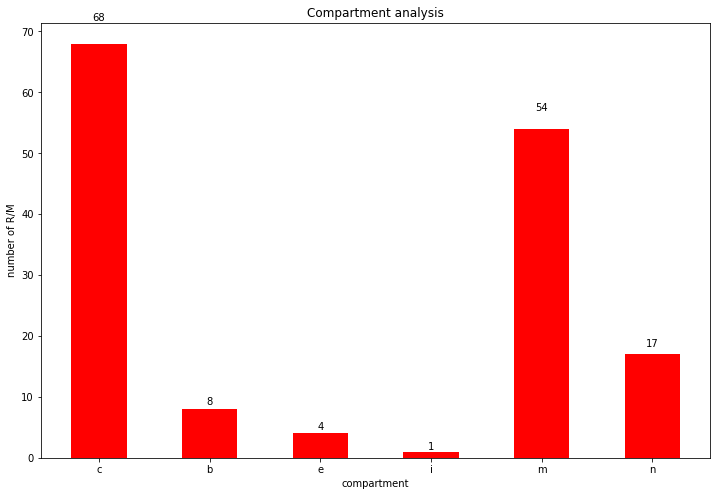

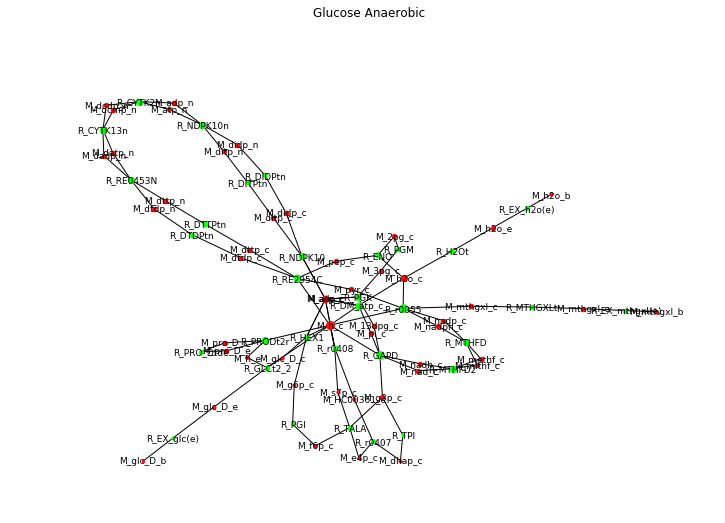

# Degree analysis


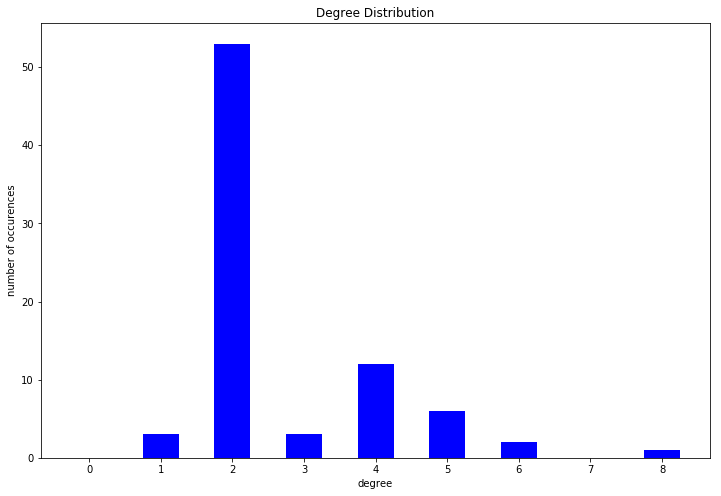

Average degree 2.7
variance: 1.71
Node M_h_c has the greatest degree: 8

# Compartment Analysis
# R/M graph'


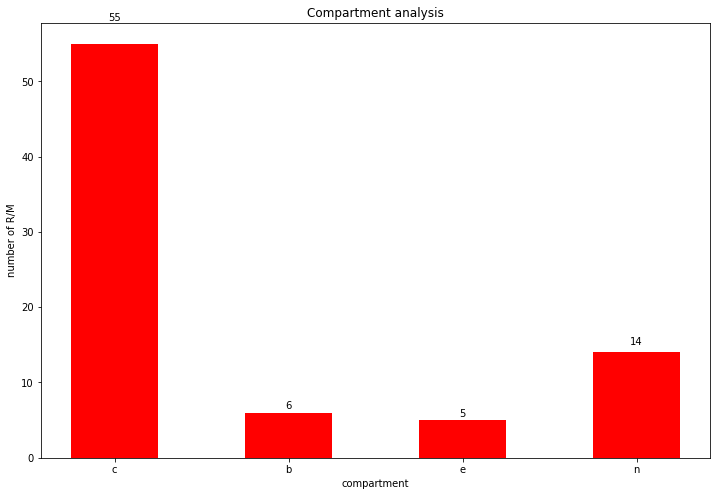

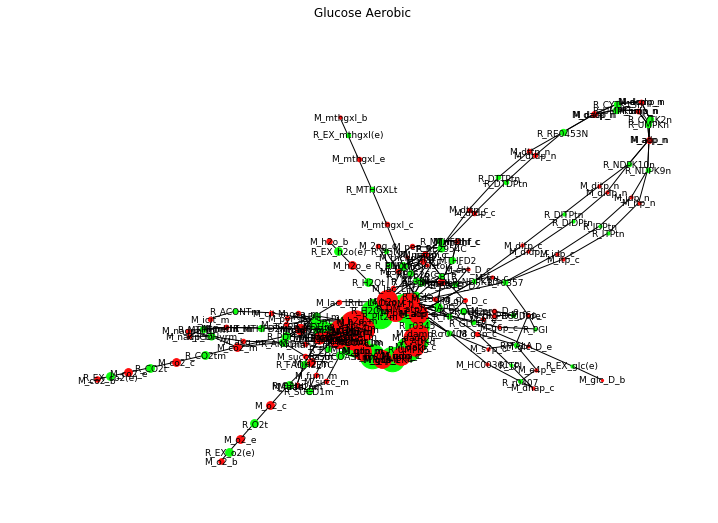

# Degree analysis


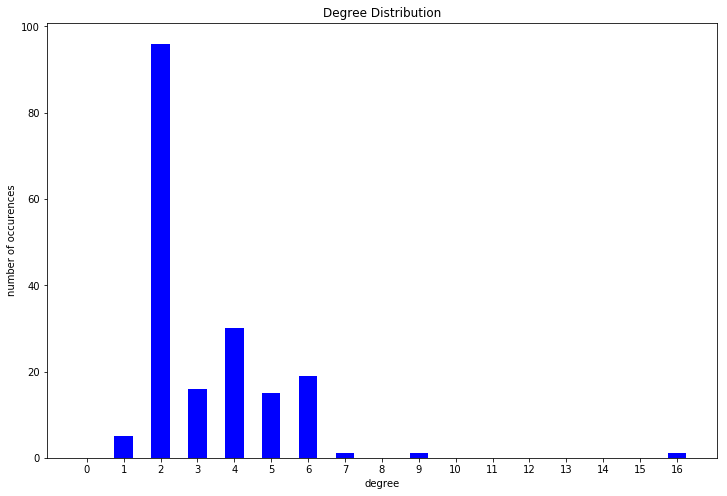

Average degree 3.1847826087
variance: 3.21585538752
Node M_h_c has the greatest degree: 16

# Compartment Analysis
# R/M graph'


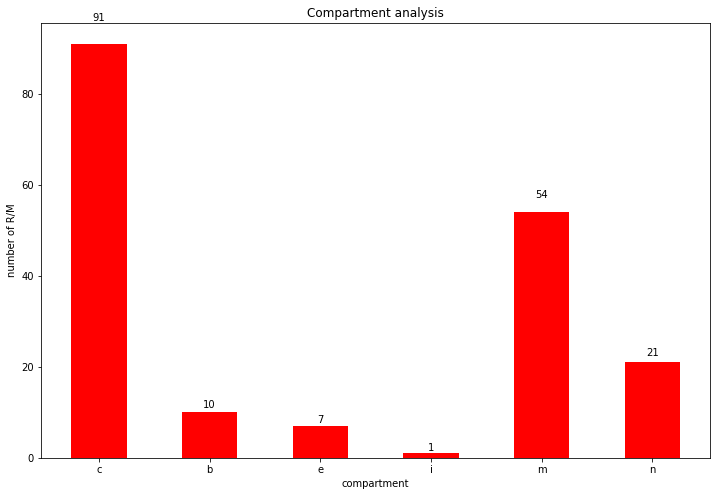

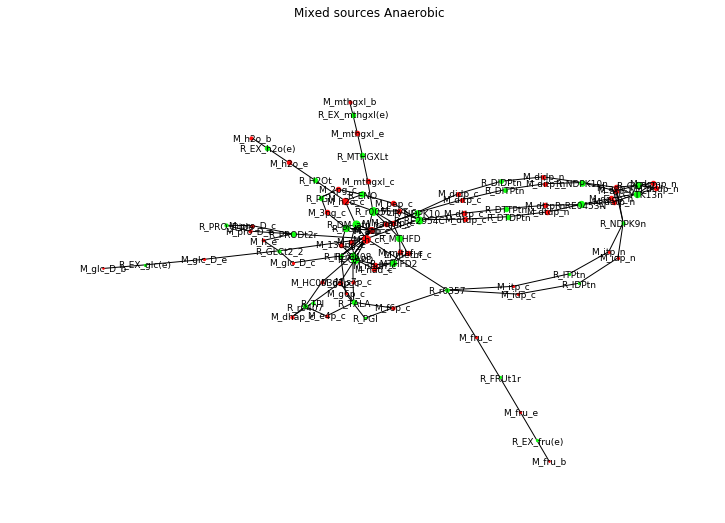

# Degree analysis


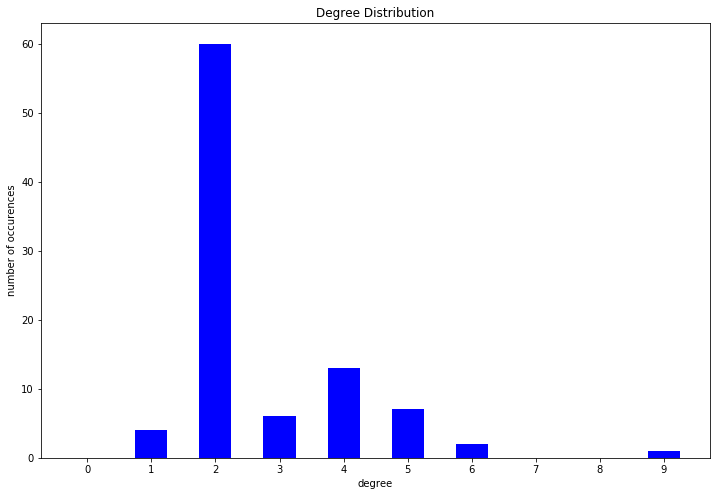

Average degree 2.68817204301
variance: 1.74147300266
Node M_h_c has the greatest degree: 9

# Compartment Analysis
# R/M graph'


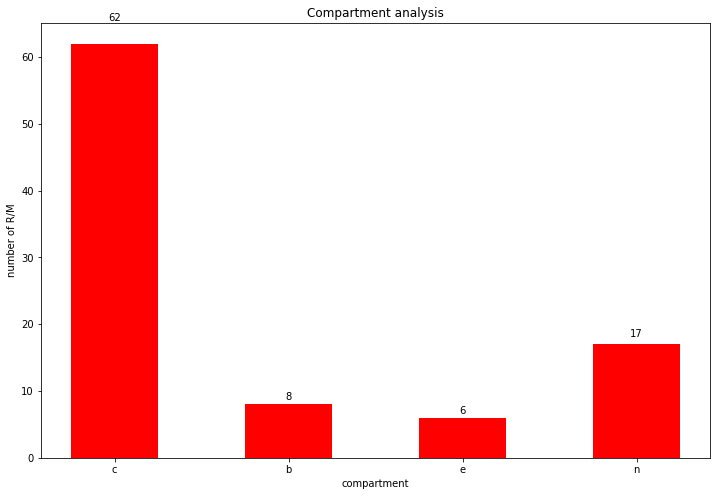

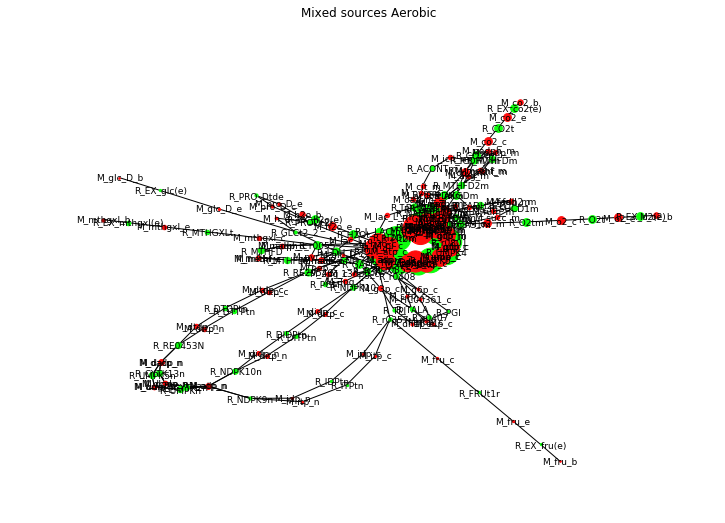

# Degree analysis


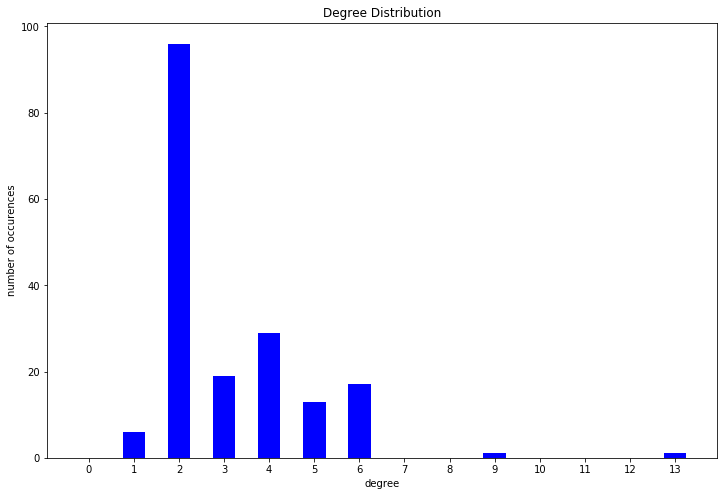

Average degree 3.07692307692
variance: 2.68639053254
Node M_h_c has the greatest degree: 13

# Compartment Analysis


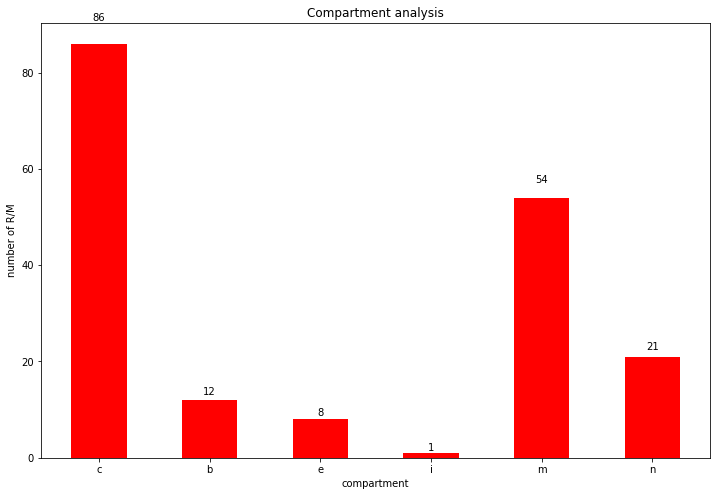

In [4]:
txtpaths = [{'path':'EX_fru(e)True.txt', 'title':'Fructose Aerobic'},
            {'path':'EX_glc(e)False.txt', 'title':'Glucose Anaerobic'},
            {'path':'EX_glc(e)True.txt', 'title':'Glucose Aerobic'},
            {'path':'EX_glc(e)EX_fru(e)False.txt', 'title':'Mixed sources Anaerobic'},
            {'path':'EX_glc(e)EX_fru(e)True.txt', 'title':'Mixed sources Aerobic'}
           ]

dist_weighted = {}
dist_unweighted = {}
nx_weighted = {}
nx_unweighted = {}
degree_distr = {}
freq_table = {}

for d in txtpaths:
    print "# R/M graph'"
    nl, el = read_MR_txt(d['path'])
    G = draw_MR_Graph(nl, el, title=d['title'])
    
    d1 = my_dijkstra('R_DM_atp_c_', G, weight='weight')
    d2 = my_dijkstra('R_DM_atp_c_', G, weight=1)
    dist_weighted[d['title']] = d1
    dist_unweighted[d['title']] = d2
    
    d3 = {}
    d4 = {}
    for node in G.nodes():
        d3[node] = NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node)
        d4[node] = NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node, weight=1)
    nx_weighted[d['title']] = d3
    nx_unweighted[d['title']] = d4
    
    print '# Degree analysis'
    degree_distr[d['title']] = degree_stats(G)
    
    print ''
    print "# Compartment Analysis"
    freq_table[d['title']] = compartment_analysis(G)
    node_num = 0    

# Shortest path

Verify that `my_dijkstra` give the correct answer by comparing its answer with that of `nx.algorithms.dijkstra_path_length`.

In [3]:
for d in txtpaths:
    title = d['title']
    d1 = dist_weighted[title]
    d2 = dist_unweighted[title]
    d3 = nx_weighted[title]
    d4 = nx_unweighted[title]

    for n in d1.keys():
        if d1[n] != d3[n] or d2[n] != d4[n]:
            print 'Error in node', n

# Report for Exercise 5

# Report for Exercise 6